In [1]:
T= True
F = False
import sys
import numpy as np
from typing import Optional, Tuple, List
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from pyFitting.__init__ import *
from pyScatt.packages import *

from pyFitting.visualization import (
        plot_data, 
        plot_fit,
        plot_residuals,
        plot_fit_with_residuals,
        plot_parameter_corners,
        plot_diagnostics,
        plot_comparison,
        plot1D,
    )
from pySAXSFitting.__init__ import *
from pySAXSFitting.formfactors.__init__ import *

The GA is not availabel.


In [2]:
outDir = '/home/yuzhang/Repos/pySAXSFitting/example/images/'

## Nanoparticle Form Factor Models

### Monodisperse NPs

In [3]:
q = np.linspace( 0.005, 0.15, 500 )

model_spm = SphereModel()
model_cbm = CubeModel()
model_ocm = OctahedronModel()
model_rdm = RhombicDodecahedronModel()

params = {
    'radius': 200.0, #in Angstrom
    'scale': 1.0,
    'background': 1e-6
}

model_spm.set_parameters(**params)
I_spm = model_spm.evaluate(q)

model_cbm.set_parameters(**params)
I_cbm = model_cbm.evaluate(q)

model_ocm.set_parameters(**params)
I_ocm = model_ocm.evaluate(q)

model_rdm.set_parameters(**params)
I_rdm = model_rdm.evaluate(q)

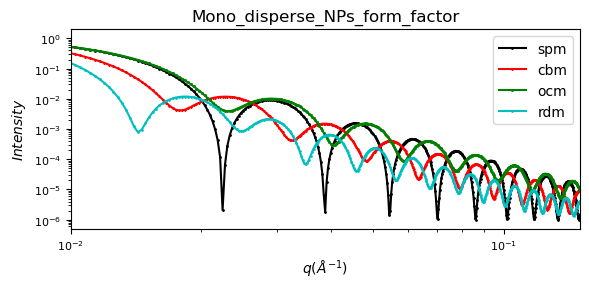

In [71]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
plot1D( x= q, y = I_spm, ax=ax, m='o', ls='-', c='k', logy=T, logx=T, markersize=1, legend='spm')
plot1D( x= q, y = I_cbm,  ax=ax, m='d', ls='-', c='r', logy=T, logx=T, markersize=1, legend='cbm')
plot1D( x= q, y = I_ocm,  ax=ax, m='s', ls='-', c='g', logy=T, logx=T, markersize=1, legend='ocm')
plot1D( x= q, y = I_rdm,  ax=ax, m='h', ls='-', c='c', logy=T, logx=T, markersize=1, legend='rdm')


ax.set_xlim(0.01,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Mono_disperse_NPs_form_factor' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


        

# Get Q-Dips

In [5]:
#from pySAXSFitting.formfactors.core.utils import get_sphere_form_factor_qdip, get_form_factor_qdip
#from pySAXSFitting.formfactors.core.__init__ import * 



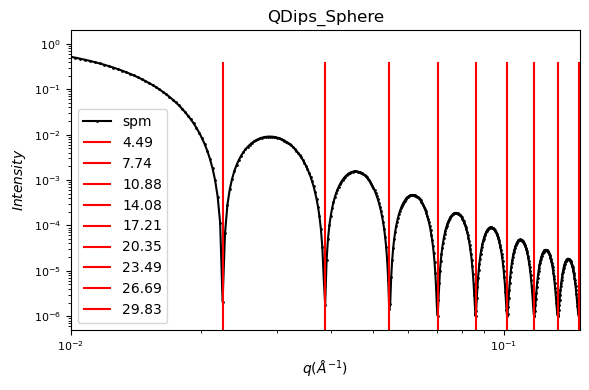

In [72]:
from pySAXSFitting.formfactors.core import get_sphere_form_factor_qdip, get_form_factor_qdip
qR = q * 200 
pn = get_form_factor_qdip( I_spm, qR, plot = False ) 

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
plot1D( x= q, y = I_spm, ax=ax, m='o', ls='-', c='k', logy=T, logx=T, markersize=1, legend='spm')
for pni in pn[:,0]:
    ax.vlines( pni/200, -.2, .4 , color='r', label = round(pni, 2)) 

ax.legend()
ax.set_xlim(0.01,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'QDips_Sphere' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


        

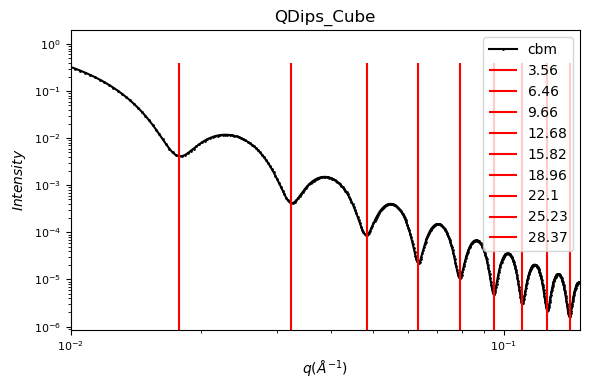

In [73]:
pn = get_form_factor_qdip( I_cbm, qR, plot = False ) 

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
plot1D( x= q, y = I_cbm, ax=ax, m='o', ls='-', c='k', logy=T, logx=T, markersize=1, legend='cbm')
for pni in pn[:,0]:
    ax.vlines( pni/200, -.2, .4 , color='r', label = round(pni, 2)) 

ax.legend()
ax.set_xlim(0.01,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'QDips_Cube' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


        

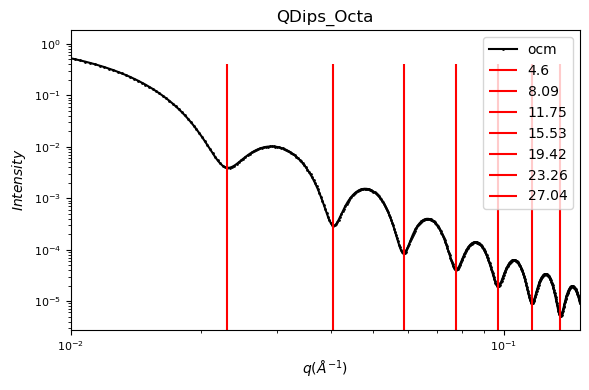

In [70]:
pn = get_form_factor_qdip( I_ocm, qR, plot = False ) 

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
plot1D( x= q, y = I_ocm, ax=ax, m='o', ls='-', c='k', logy=T, logx=T, markersize=1, legend='ocm')
for pni in pn[:,0]:
    ax.vlines( pni/200, -.2, .4 , color='r', label = round(pni, 2)) 

ax.legend()
ax.set_xlim(0.01,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'QDips_Octa' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


        

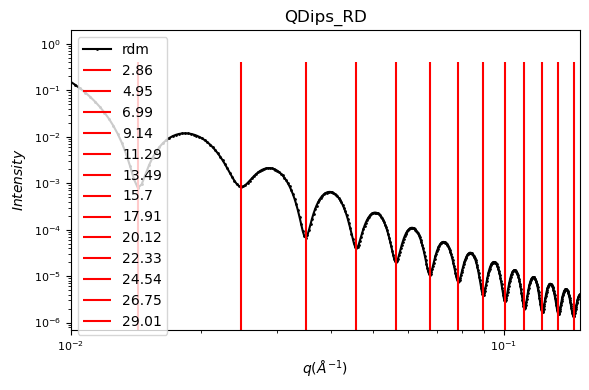

In [69]:
pn = get_form_factor_qdip( I_rdm, qR, plot = False ) 

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
plot1D( x= q, y = I_rdm, ax=ax, m='o', ls='-', c='k', logy=T, logx=T, markersize=1, legend='rdm')
for pni in pn[:,0]:
    ax.vlines( pni/200, -.2, .4 , color='r', label = round(pni, 2)) 

ax.legend()
ax.set_xlim(0.01,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'QDips_RD' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


        

## Polydisperse NPs

In [62]:
model_spp = PolydisperseSphereModel()
# model_cbp = PolydisperseCubeModel()
# model_ocp = PolydisperseOctahedronModel()
# model_rdp = PolydisperseRhombicDodecahedronModel()

params = {
    'radius': 200.0, #in Angstrom
    'sigma_rel': 0.05,
    'scale': 1.0,
    'background':1e-6,    
}


model_spp.set_parameters(**params)
I_spp = model_spp.evaluate(q)

# model_cbp.set_parameters(**params)
# I_cbp = model_cbp.evaluate(q)

# model_ocp.set_parameters(**params)
# I_ocp = model_ocp.evaluate(q)

# model_rdp.set_parameters(**params)
# I_rdp = model_rdp.evaluate(q)


## Build Fast Model

In [38]:
#%run -i /home/yuzhang/Repos/pySAXSFitting/pySAXSFitting/formfactors/__init__.py
#%run -i /home/yuzhang/Repos/pySAXSFitting/pySAXSFitting/formfactors/fast_fitting.py
from pySAXSFitting.formfactors import prebuild_tables
from pySAXSFitting.formfactors.__init__ import *
print( FORM_FACTOR_TABLES )

/home/yuzhang/Repos/pySAXSFitting/pySAXSFitting/form_factor_tables/


In [40]:
prebuild_tables(shapes=['sphere']) #['sphere', 'cube', 'tetrahedron', 'octahedron', 'rhombic_dodecahedron']


Pre-building Form Factor Lookup Tables
Shapes: sphere
q: 3000 points from 0.0010 to 0.3000 Å⁻¹
r: 5000 points from 1.0 to 5000.0 Å
Nrot: 5000
Parallel: True
Cache dir: /home/yuzhang/Repos/pySAXSFitting/pySAXSFitting/form_factor_tables/


Building lookup table for sphere...
  q: 3000 points from 0.0010 to 0.3000 Å⁻¹
  r: 5000 points from 1.0 to 5000.0 Å
  Nrot: 5000
  Parallel: True


Computing sphere: 100%|███████████████████| 5000/5000 [00:02<00:00, 2176.14it/s]


✓ Table built and saved to /home/yuzhang/Repos/pySAXSFitting/pySAXSFitting/form_factor_tables/sphere_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

✓ All tables built successfully!


Available Form Factor Tables

Shape: cube
  q: 100 points, range [0.001, 0.3]
  r: 10 points, range [1, 5000]
  Nrot: 5000
  File: cube_q0.0010-0.3000_100_r1.0-5000.0_10.npz

Shape: cube
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: cube_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

Shape: tetrahedron
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: tetrahedron_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

Shape: octahedron
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: octahedron_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

Shape: rhombic_dodecahedron
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: rhombic_dodecahedron_q0.0010-0.3000_3000_r1.0-50

## Fast model (pre-calculated)

In [41]:
fftm = FormFactorTableManager(FORM_FACTOR_TABLES)
fftm.list_tables()


Available Form Factor Tables

Shape: cube
  q: 100 points, range [0.001, 0.3]
  r: 10 points, range [1, 5000]
  Nrot: 5000
  File: cube_q0.0010-0.3000_100_r1.0-5000.0_10.npz

Shape: cube
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: cube_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

Shape: tetrahedron
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: tetrahedron_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

Shape: octahedron
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: octahedron_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

Shape: rhombic_dodecahedron
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: rhombic_dodecahedron_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz

Shape: sphere
  q: 3000 points, range [0.001, 0.3]
  r: 5000 points, range [1, 5000]
  Nrot: 5000
  File: sphere_q0.0010-0.3000_3000_r1.0-5000.0_5000.npz



In [56]:
%run -i /home/yuzhang/Repos/pySAXSFitting/pySAXSFitting/formfactors/fast_fitting.py

In [58]:
model_sppf = FastPolydisperseSphereModel()
model_cbpf = FastPolydisperseCubeModel()
model_ocpf = FastPolydisperseOctahedronModel()
model_rdpf = FastPolydisperseRhombicDodecahedronModel()



Loading existing table for sphere...
Loading existing table for cube...
Loading existing table for octahedron...
Loading existing table for rhombic_dodecahedron...


In [59]:
params = {
    'radius': 200.0, #in Angstrom
    'scale': 1.0,
    'sigma_rel': 0.05,
    'background': 1e-6
}
model_sppf.set_parameters(**params)
I_sppf = model_sppf.evaluate(q)
model_cbpf.set_parameters(**params)
I_cbpf = model_cbpf.evaluate(q)
model_ocpf.set_parameters(**params)
I_ocpf = model_ocpf.evaluate(q)
model_rdpf.set_parameters(**params)
I_rdpf = model_rdpf.evaluate(q)


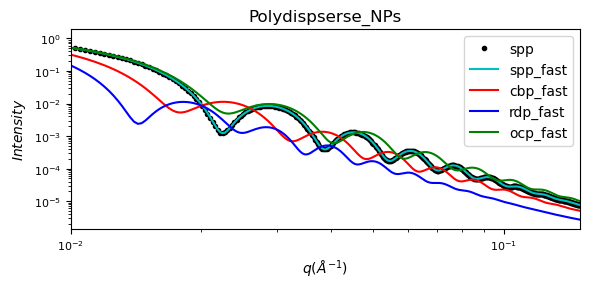

In [68]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
plot1D( x= q, y = I_spp, ax=ax, m='o', ls='', c='k', logy=T, logx=T, markersize=3, legend='spp')
plot1D( x= q, y = I_sppf, ax=ax, m='', ls='-', c='c', logy=T, logx=T, markersize=1, legend='spp_fast')
#plot1D( x= q, y = I_cbp,  ax=ax, m='d', ls='-', c='k', logy=T, logx=T, markersize=3, legend='cbp')
#plot1D( x= q, y = I_ocp,  ax=ax, m='s', ls='-', c='g', logy=T, logx=T, markersize=1, legend='ocp')
#plot1D( x= q, y = I_rdp,  ax=ax, m='h', ls='-', c='k', logy=T, logx=T, markersize=3, legend='rdp')
plot1D( x= q, y = I_cbpf,  ax=ax, m='', ls='-', c='r', logy=T, logx=T, markersize=1, legend='cbp_fast')
plot1D( x= q, y = I_rdpf,  ax=ax, m='', ls='-', c='b', logy=T, logx=T, markersize=1, legend='rdp_fast')
#plot1D( x= q, y = I_ocp,  ax=ax, m='s', ls='-', c='k', logy=T, logx=T, markersize=1, legend='ocp')
plot1D( x= q, y = I_ocpf,  ax=ax, m='', ls='-', c='g', logy=T, logx=T, markersize=1, legend='ocp_fast')

ax.legend()
ax.set_xlim(0.01,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Polydispserse_NPs' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


# Fit on a simulated data


Loading existing table for cube...


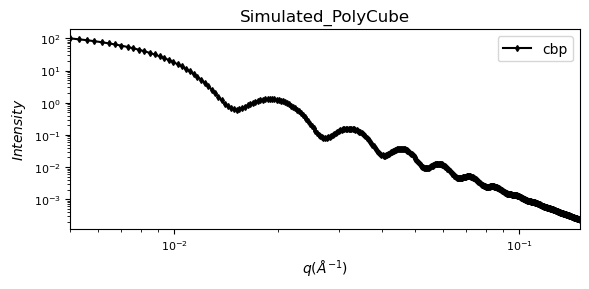

In [416]:
params = {
    'radius': 238.0, #in Angstrom
    'scale': 100.0,
    'sigma_rel': 0.05,
    'background': 1e-6
}
model_sim =  FastPolydisperseCubeModel()

model_sim.set_parameters(**params)
I_sim = model_sim.evaluate(q)
I_sim += I_sim * 0.00 * np.random.randn( len(q) ) 


fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
plot1D( x= q, y = I_sim,  ax=ax, m='d', ls='-', c='k', logy=T, logx=T, markersize=3, legend='cbp')
ax.legend()
ax.set_xlim(0.005,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Simulated_PolyCube' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


## Dip Analyzer

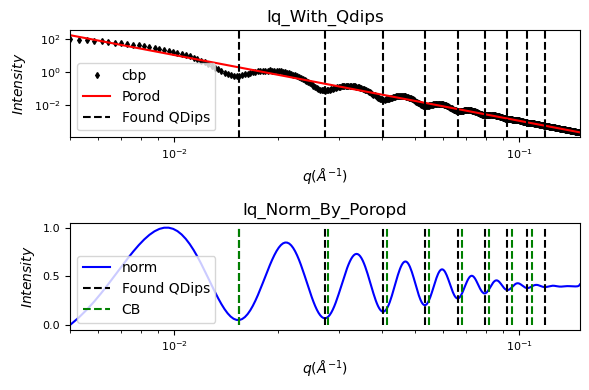

In [419]:
from pySAXSFitting.analysis import (  DipDetector, DipCharacterizer, DipMatcher)
from pySAXSFitting.analysis import (  QR_MINIMA_CB, QR_MINIMA_OC, QR_MINIMA_RD, QR_MINIMA_SP )
#%run -i /home/yuzhang/Repos/pySAXSFitting/pySAXSFitting/analysis/dip_detector.py

# Detect
detector = DipDetector() #smooth_sigma=1e-3)
dips = detector.find_dips(q, I_sim, q_range=(0.005, 0.15), porod_region= (0.01, 0.1) )

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(211)
plot1D( x= q, y = I_sim,  ax=ax, m='d', ls='', c='k', logy=T, logx=T, markersize=3, legend='cbp')
plot1D( x= detector.q_porod, y = detector.I_porod, ax=ax, m='', ls='-', c='r', logy=T, logx=T, markersize=3, legend='Porod')
ax.vlines( dips.q_positions, 1e-4, 1e4, color='k', linestyle='--' , label='Found QDips')
ax.legend()
ax.set_xlim(0.005,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Iq_With_Qdips' 
ax.set_title(filename)

 
ax = fig.add_subplot(212)
plot1D( x= detector.q_porod, y = detector.I_norm, ax=ax, m='', ls='-', c='b', logy=F, logx=T, markersize=3, legend='norm')
ax.vlines( dips.q_positions, 1e-4, 1, color='k', linestyle='--' , label='Found QDips')
ax.set_title('')
ax.set_xlim( 0.007, 0.12)

ax.vlines( QR_MINIMA_CB[:8]/QR_MINIMA_CB[0] * dips.q_positions[0] , 
           1e-5, 1.0, color='g', linestyle='--' , label='CB')

# ax.vlines( QR_MINIMA_OC[:8]/QR_MINIMA_OC[0] * dip_pattern.q_positions[0], 
#           1e-5, 1.0, color='r', linestyle='--', label='OC')
ax.legend()
ax.set_xlim(0.005,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Iq_Norm_By_Poropd' 
ax.set_title(filename)

ax.legend()
fig.tight_layout()
fp = 'Iq_Sim_Cube_Norm'   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


In [420]:
dips.q_positions

array([0.01546092, 0.02737475, 0.0404509 , 0.05323647, 0.06631263,
       0.07938878, 0.09246493, 0.10554108, 0.11890782])

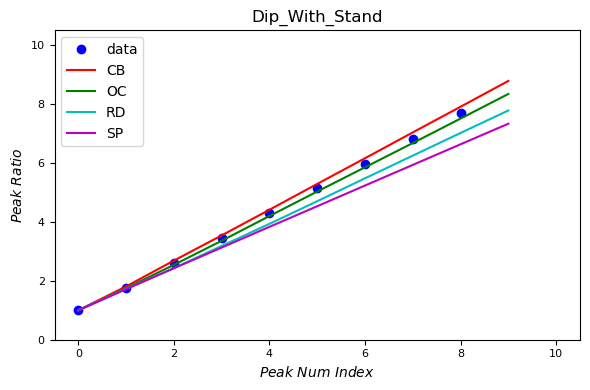

In [424]:
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
plot1D( x= None, y = dips.q_positions/dips.q_positions[0], ax=ax, m='o', ls='', c='b', logy=F, logx=F, markersize=6, legend = 'data')
plot1D( x= None, y = QR_MINIMA_CB[:10]/QR_MINIMA_CB[0] , ax=ax, m='', ls='-', c='r', legend='CB', logy=F, logx=F, markersize=3)
plot1D( x= None, y = QR_MINIMA_OC[:10]/QR_MINIMA_OC[0] , ax=ax, m='', ls='-', c='g', legend='OC', logy=F, logx=F, markersize=3)
plot1D( x= None, y = QR_MINIMA_RD[:10]/QR_MINIMA_RD[0] , ax=ax, m='', ls='-', c='c', legend='RD', logy=F, logx=F, markersize=3)
plot1D( x= None, y = QR_MINIMA_SP[:10]/QR_MINIMA_SP[0] , ax=ax, m='', ls='-', c='m', legend='SP', logy=F, logx=F, markersize=3)


ax.legend()
ax.set_xlim(-.5, 10.5)
ax.set_ylim(0, 10.5)
ax.set_xlabel(r'$Peak\ Num\ Index$')
ax.set_ylabel( r'$Peak\ Ratio$' ) 
filename = 'Dip_With_Stand' 
ax.set_title(filename)

ax.legend()
fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)



## Align Dips with Candidate Shapes

In [425]:
# #from pyFitting.evaluation.metrics import evaluate, StandardEvaluator
# %run -i /home/yuzhang/Repos/pyFitting/pyFitting/evaluation/metrics.py


# ydip = dips.q_positions/dips.q_positions[0]
# Candidate_Stand_Dips_Dict = dict( sp=QR_MINIMA_SP, oc=QR_MINIMA_OC, cb=QR_MINIMA_CB, rd=QR_MINIMA_RD )
# for stand in Candidate_Stand_Dips_Dict:
#     v = Candidate_Stand_Dips_Dict[stand]
#     N = len(ydip)
#     metrics = evaluate(  ydip,  v[:N]/v[0] )
#     print( stand, metrics['rmse'] ) 
    


In [441]:
%run -i /home/yuzhang/Repos/pyFitting/pyFitting/aligner/PeakAligner.py

<Figure size 640x480 with 0 Axes>

In [430]:
#%run -i /home/yuzhang/Repos/pyFitting/pyFitting/aligner/PeakAligner.py
#from pyFitting.aligner.__init__ import *
from pyFitting.aligner.PeakAligner import  PeakAligner
aligner = PeakAligner( relative_tolerance=0.01, min_matches=3, normalization_modes=[ 'first', 'auto'])

#dips.q_positions #/dips.q_positions[0]
ydip = dips.q_positions #/dips.q_positions[0]
#ydip = np.array([0.01517034, 0.02737475, 0.04016032, 0.05352705, 0.06602204])
Candidate_Stand_Dips_Dict = dict( sp=QR_MINIMA_SP, oc=QR_MINIMA_OC, cb=QR_MINIMA_CB, rd=QR_MINIMA_RD )
N = 14 #10 #len(ydip)
Yd = ydip
v = Candidate_Stand_Dips_Dict['sp']
Yr1 = v[:N]/v[0]
#metrics = evaluate(  ydip,  v[:N]/v[0] ) 
v = Candidate_Stand_Dips_Dict['cb'] 
Yr2 = v[:N]/v[0]
v = Candidate_Stand_Dips_Dict['oc'] 
Yr3 = v[:N]/v[0]
v = Candidate_Stand_Dips_Dict['rd'] 
Yr4 = v[:N]/v[0]
structures_dict = { 'sp': Yr1, 'cb':Yr2, 'oc': Yr3, 'rd': Yr4    }

In [440]:
Yr1.shape, ydip.shape

((14,), (9,))

In [433]:
# Align_dict = {}

# # Try normalizing by each peak in Yd
# cts = 0 
# for m, _ in enumerate(Yr):
#     yrm = Yr/Yr[m]
#     align_dict_yr = {}    
#     for i, ydi in enumerate(Yd):       
#         Yri = yrm * ydi  # Scale Yr by this peak
#         align_dict = {}    
#         # Match all peaks in Yd to scaled Yr
#         for j, ydj in enumerate(Yd):
#             ind = find_index(Yri, ydj)
#             align_dict[j] = [ind, ydj, Yri[ind]]
#         align_dict_yr[i] = align_dict 
#     Align_dict[m] = align_dict_yr

In [434]:
 #Align_dict[1]

The best matched shape is cb


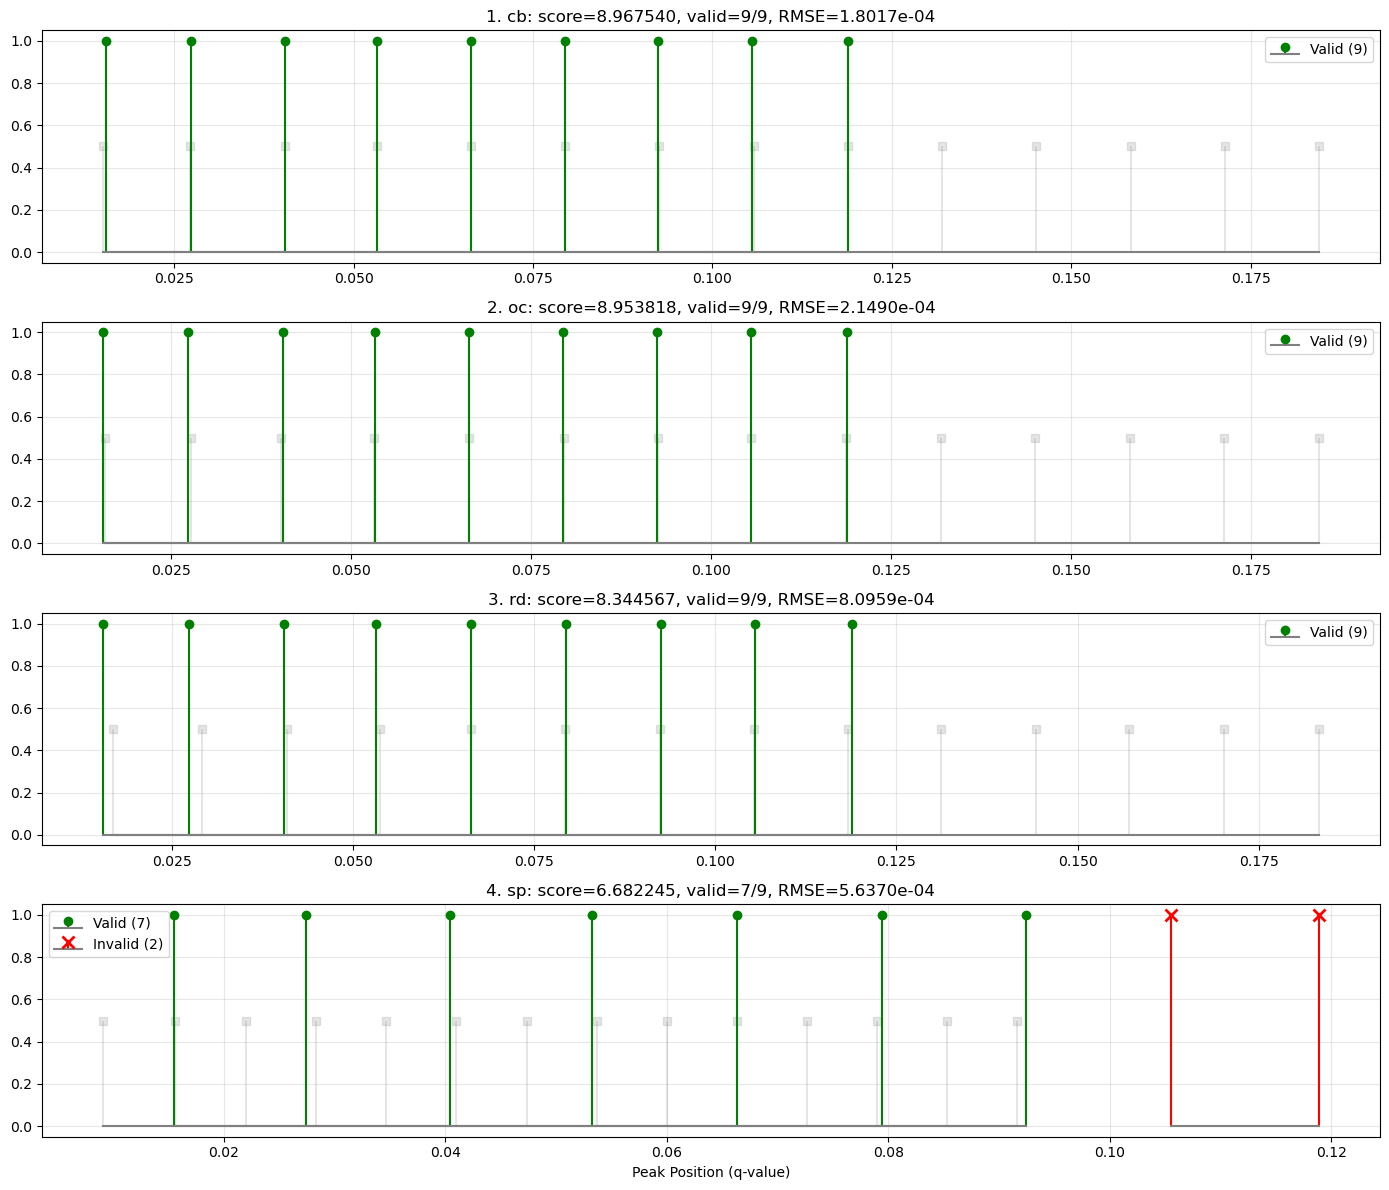

In [454]:
#score, Align_dict, Align_dict_refine = get_align_score(Yd, Yr1)
#res1 = get_best_alignment(Yd, Yr4, tolerance=1, score_weights=[1.0, 100]) 
#res1 = get_best_alignment(Yd, Yr2, tolerance=1, score_weights=[1.0, 100])
Res = compare_structures(Yd, structures_dict, tolerance=1, score_weights=[1.0, 1e6])
best_shape = list(Res.keys())[0]
print( f'The best matched shape is {best_shape}' ) 
fig = plot_comparison( Yd, Res )
#fig.tight_layout()
fp = 'align_stand_structure'   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)


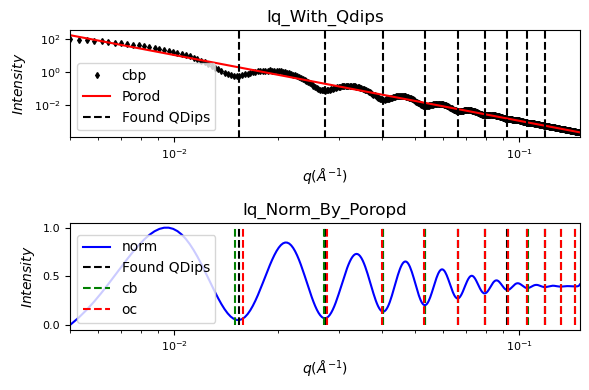

In [455]:

fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(211)
plot1D( x= q, y = I_sim,  ax=ax, m='d', ls='', c='k', logy=T, logx=T, markersize=3, legend='cbp')
plot1D( x= detector.q_porod, y = detector.I_porod, ax=ax, m='', ls='-', c='r', logy=T, logx=T, markersize=3, legend='Porod')
ax.vlines( dips.q_positions, 1e-4, 1e4, color='k', linestyle='--' , label='Found QDips')
ax.legend()
ax.set_xlim(0.005,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Iq_With_Qdips' 
ax.set_title(filename)

 
ax = fig.add_subplot(212)
plot1D( x= detector.q_porod, y = detector.I_norm, ax=ax, m='', ls='-', c='b', logy=F, logx=T, markersize=3, legend='norm')
ax.vlines( dips.q_positions, 1e-4, 1, color='k', linestyle='--' , label='Found QDips')
ax.set_title('')
ax.set_xlim( 0.007, 0.12)
shape = list(Res.keys())[0]
ax.vlines( Res[shape]['Yr_scaled'],   1e-5, 1.0, color='g', linestyle='--' , label=shape)
shape = list(Res.keys())[1]
ax.vlines( Res[shape]['Yr_scaled'],   1e-5, 1.0, color='r', linestyle='--' , label=shape)


# ax.vlines( QR_MINIMA_OC[:8]/QR_MINIMA_OC[0] * dip_pattern.q_positions[0], 
#           1e-5, 1.0, color='r', linestyle='--', label='OC')
ax.legend()
ax.set_xlim(0.005,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Iq_Norm_By_Poropd' 
ax.set_title(filename)

ax.legend()
fig.tight_layout()
fp = 'Iq_Sim_Cube_Norm_with_aligned'   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)

## Conduct fitting

In [456]:
initial = {
    'radius': 200,
    'sigma_rel': 0.1,
    'scale': 1.0,
    'background': 0
}

bounds = {
    'radius': (10, 500),
    'sigma_rel': (0, 0.5),
    'scale': (1e-2, 100),
    'background': (0, 10)
}

loss = MSELoss(use_log=True)
optimizer= 'Nelder-Mead' #methods = ['SLSQP', 'L-BFGS-B', 'Powell', 'TNC', 'trust-constr', 'Nelder-Mead']
fitter = Fitter(data, model, loss = loss, optimizer= optimizer )

In [457]:
t0 = time.time()
result = fitter.fit(initial_guess=initial, bounds=bounds)
run_time( t0 )

print(f"Radius: {result.parameters.values['radius']:.1f} Å")
print(f"Polydispersity: {result.parameters.values['sigma_rel']*100:.1f}%")
print( result.parameters.values ) 

Total time: 0.356 sec
Radius: 238.5 Å
Polydispersity: 6.1%
{'radius': 238.53467979388688, 'sigma_rel': 0.06101980166983355, 'scale': 7.984449052362275, 'background': 0.00010119497273642069}


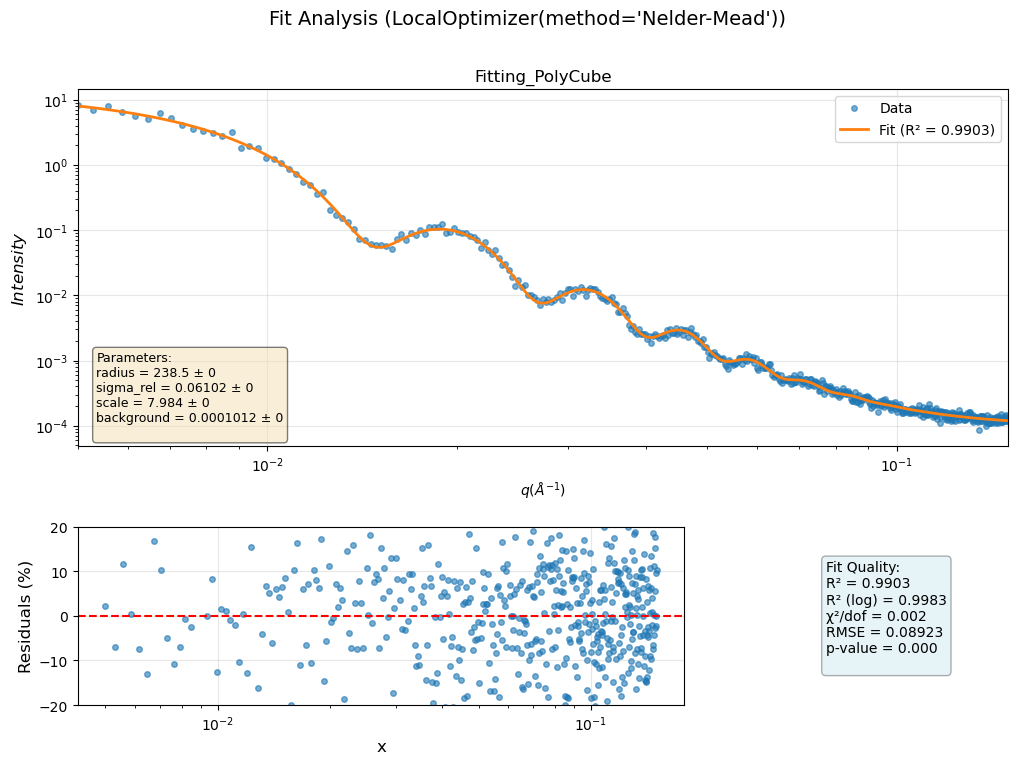

In [458]:
fig, axes = plot_fit_with_residuals( result, logx=True, logy=True ) 
ax = axes[0]
ax.legend()
ax.set_xlim(0.005,0.15)
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel( r'$Intensity$' ) 
filename = 'Fitting_PolyCube' 
ax.set_title(filename)

fig.tight_layout()
fp = filename   + '.png' 
plt.savefig( outDir + fp, dpi=fig.dpi)

# THE END